## Jinghao Yan
## ANLY 590 HW1

## Exercise 1

### Problem 1

Plot (draw) a network with: 2 inputs, 2 hidden layers (where the first layer contains 3 hidden units and the
second contains 2 hidden units) and a 3-class output (use a softmax function)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# network
from IPython.display import Image, display
img = 'prob1_plot22.PNG'
display(Image(url=img))

### Problem 2

Write-out the mathematical equation for this network.

z1 = v11\*max(0, h21) + v21\*max(0, h22) + c

z2 = v12\*max(0, h21) + v22\*max(0, h22) + c

z3 = v13\*max(0, h21) + v23\*max(0, h22) + c

y_hat = [(e^z1/sum_k(e^zk)), (e^z2/sum_k(e^zk)), (e^z3/sum_k(e^zk))]

Detailed:

z1 = v11\*max(0, w31\*max(0, x1\*w11+x2\*w21+b1) + w41\*max(0, x1\*w12+x2\*w22+b2) + w51\*max(0, x1\*w13+x2\*w23+b3) + b4) 
\+ v21\*max(0, w32\*max(0, x1\*w11+x2\*w21+b1) + w42\*max(0, x1\*w12+x2\*w22+b2) + w52\*max(0, x1\*w13+x2\*w23+b3) + b5)
\+ c

z2 = v12\*max(0, w31\*max(0, x1\*w11+x2\*w21+b1) + w41\*max(0, x1\*w12+x2\*w22+b2) + w51\*max(0, x1\*w13+x2\*w23+b3) + b4) 
\+ v22\*max(0, w32\*max(0, x1\*w11+x2\*w21+b1) + w42\*max(0, x1\*w12+x2\*w22+b2) + w52\*max(0, x1\*w13+x2\*w23+b3) + b5)
\+ c

z3 = v13\*max(0, w31\*max(0, x1\*w11+x2\*w21+b1) + w41\*max(0, x1\*w12+x2\*w22+b2) + w51\*max(0, x1\*w13+x2\*w23+b3) + b4) 
\+ v23\*max(0, w32\*max(0, x1\*w11+x2\*w21+b1) + w42\*max(0, x1\*w12+x2\*w22+b2) + w52\*max(0, x1\*w13+x2\*w23+b3) + b5)
\+ c

### Problem 3

Write-out the function in python, call it ff_nn_2_ReLu(...)

In [3]:
# helper functions
def relu(x):
    return np.maximum(x,0)

def softmax(z):
    #return np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]
    return np.exp(z) / np.sum(np.exp(z), axis=0)

# define function
def ff_nn_2_ReLu(X,parameters):
    # Unpacking parameters
    W1,W2,b1,b2,b3,V = parameters
    
    # Forward pass
    a1 = W1.dot(X) + b1
    H1 = relu(a1)
    a2 = W2.dot(H1) + b2
    H2 = relu(a2)
    a3 = V.dot(H2) + b3
    Y_hat = softmax(a3)
    return Y_hat

### Problem 4

Given the specified set of weight matrices, what are the class probabilities associated with the forward pass of each sample?

In [4]:
W1 = np.array([[1,0] ,[-1,0] ,[0,0.5]])
W2 = np.array([[1,0,0] ,[-1,-1,0]])
b1 = np.transpose(np.array([[0,0,1]]))
b2 = np.transpose(np.array([[1,-1]]))
c = np.transpose(np.array([[1,0,0]]))
V = np.array([[1,1], [0,0], [-1,-1]])
X = np.array([[1,0,0], [-1,-1,1]])

In [5]:
ff_nn_2_ReLu(X, (W1,W2,b1,b2,c,V))

array([[0.94649912, 0.84379473, 0.84379473],
       [0.04712342, 0.1141952 , 0.1141952 ],
       [0.00637746, 0.04201007, 0.04201007]])

## Exercise 2

### Problem 1

What are the partial derivatives of $f$ with respect to $x$ and to $y$?

$$
\frac{\partial{f}}{\partial{x}} = -2(1-x) - 400x(y-x^2)
$$

$$
\frac{\partial{f}}{\partial{y}} = 200(y-x^2)
$$

### Problem 2

Create a visualization of the contours of the Rosenbrock function.

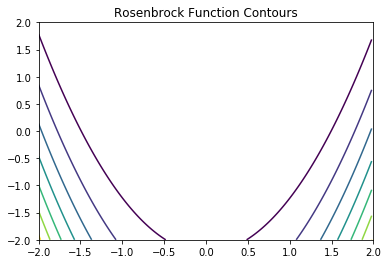

In [6]:
delta = 0.02
x = np.arange(-2, 2, delta)
y = np.arange(-2, 2, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2+100*(Y-X**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
plt.title('Rosenbrock Function Contours')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

### Problem 3

Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [7]:
# gradient f function
def grad_f(vector):
    x, y = vector
    df_dx = -2*(1-x) - 400*x*(y-x**2)
    df_dy = 200*(y-x**2)
    return np.array([df_dx, df_dy])

In [8]:
# gradient descent function (from Professor Hines' Gradient_Descent jupyter notebook)

def grad_descent(starting_point=None, iterations=10, learning_rate=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-2,2,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

Visualizing with a few different learning rates:

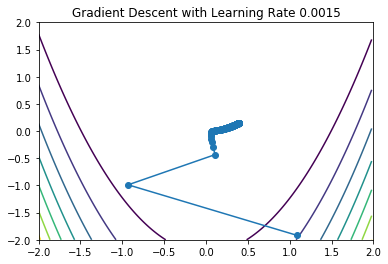

In [9]:
# set random seed
np.random.seed(10)
l = 0.0015
traj = grad_descent(iterations=200, learning_rate=l)

fig, ax = plt.subplots()
CS = ax.contour(X,Y,Z)
x = traj[:,0]
y = traj[:,1]
plt.title('Gradient Descent with Learning Rate '+str(l))
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot(x,y,'-o')

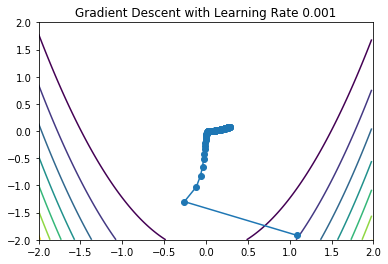

In [10]:
# set random seed
np.random.seed(10)
l = 0.001
traj = grad_descent(iterations=200, learning_rate=l)

fig, ax = plt.subplots()
CS = ax.contour(X,Y,Z)
x = traj[:,0]
y = traj[:,1]
plt.title('Gradient Descent with Learning Rate '+str(l))
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot(x,y,'-o')

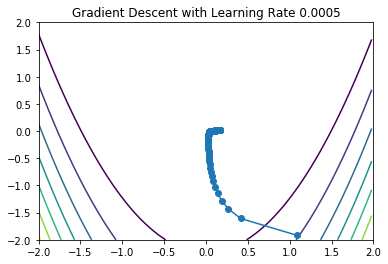

In [11]:
# set random seed
np.random.seed(10)
l = 0.0005
traj = grad_descent(iterations=200, learning_rate=l)

fig, ax = plt.subplots()
CS = ax.contour(X,Y,Z)
x = traj[:,0]
y = traj[:,1]
plt.title('Gradient Descent with Learning Rate '+str(l))
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot(x,y,'-o')

### Problem 4

Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm's hyperparameters.

In [12]:
# gradient descent function with momentum (from Professor Hines' Gradient_Descent jupyter notebook)

def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-2,2,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

Visualizing with a few different settings of the algorithm's hyperparameters:

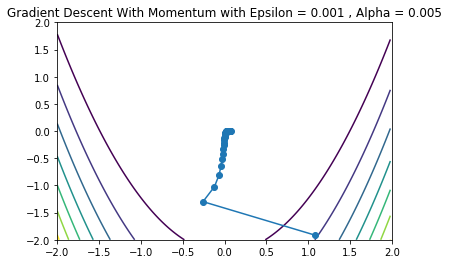

In [13]:
np.random.seed(10)
e=0.001
a=0.005
traj = grad_descent_with_momentum(iterations=50, epsilon=e, alpha=a)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.title('Gradient Descent With Momentum with Epsilon = ' + str(e) +' , Alpha = ' + str(a))
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot(x,y,'-o')

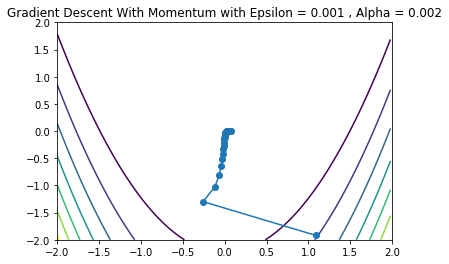

In [14]:
np.random.seed(10)
e=0.001
a=0.002
traj = grad_descent_with_momentum(iterations=50, epsilon=e, alpha=a)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.title('Gradient Descent With Momentum with Epsilon = ' + str(e) +' , Alpha = ' + str(a))
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot(x,y,'-o')

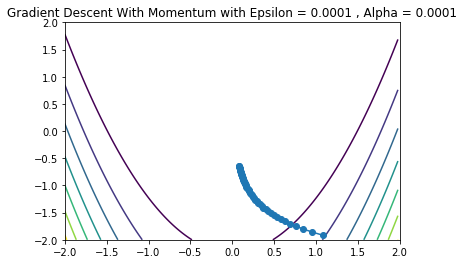

In [15]:
np.random.seed(10)
e=0.0001
a=0.0001
traj = grad_descent_with_momentum(iterations=50, epsilon=e, alpha=a)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.title('Gradient Descent With Momentum with Epsilon = ' + str(e) +' , Alpha = ' + str(a))
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot(x,y,'-o')

## Exercise 3

### Problem 1

For the same network as in Number 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

### Problem 2

Write a function grad_f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [16]:
# helper functions
def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)
    return  -tot.sum()

def y_hat(input_, param_):
    W1 = param_[0:6].reshape(3, 2)
    W2 = param_[6:12].reshape(2, 3)
    W3 = param_[12:18].reshape(3, 2)
    b1 = param_[18:21].reshape(3, 1)
    b2 = param_[21:23].reshape(2, 1)
    c = param_[23:26].reshape(3, 1)

    H1 = relu(W1.dot(input_) + b1)
    H2 = relu(W2.dot(H1) + b2)
    H3 = W3.dot(H2) + c

    Y_hat = softmax(H3)
    return(Y_hat)

def grad_f(param_, x, y):
    W1 = param_[0:6].reshape(3, 2)
    W2 = param_[6:12].reshape(2, 3)
    v = param_[12:18].reshape(3, 2)
    b1 = param_[18:21].reshape(3, 1)
    b2 = param_[21:23].reshape(2, 1)
    c = param_[23:26].reshape(3, 1)

    a1 = W1.dot(x) + b1
    H1 = relu(a1)

    a2 = W2.dot(H1) + b2
    H2 = relu(a2)
    H3 = v.dot(H2) + c
    Y_hat = softmax(H3)

    d_v = (Y_hat - y).dot(H2.T)
    d_c = (Y_hat - y).sum(axis = 1)
    d_W1 = (W2.T.dot((V.T.dot((Y_hat - y))) * (H2 > 0)) * (H1 > 0)).dot(x.T)
    d_b1 = (W2.T.dot((V.T.dot((Y_hat - y))) * (H2 > 0)) * (H1 > 0)).sum(axis = 1)
    d_W2 = ((V.T.dot((Y_hat - y))) * (H2 > 0)).dot(H1.T)
    d_b2 = ((V.T.dot((Y_hat - y))) * (H2 > 0)).sum(axis = 1)

    z = [d_W1, d_W2, d_b1, d_b2, d_v, d_c]
    z = [param.flatten() for param in z]
    z = np.concatenate(z)
    return(z)

def grad_descent(x, y, iterations=10, learning_rate=0.02):
    W1 = np.random.uniform(-0.1,0.1,size = 6).reshape(3, 2)
    W2 = np.random.uniform(-0.1,0.1,size = 6).reshape(2, 3)
    V = np.random.uniform(-0.1,0.1,size = 6).reshape(3, 2)

    b1 = np.random.uniform(-0.1,0.1,size = 3).reshape(3, 1)
    b2 = np.random.uniform(-0.1,0.1,size = 2).reshape(2, 1)
    c = np.random.uniform(-0.1,0.1,size = 3).reshape(3, 1)

    point = [param.flatten() for param in [W1, W2, V, b1, b2, c]]
    point = np.concatenate(point)
    trajectory = [point]
    losses = [loss(y, y_hat(x, point))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, y_hat(x, point)))
        return (np.array(trajectory), losses)

### Problem 3

Generate a synthetic dataset of 3 equally sampled bivariate Gaussian distributions with specified parameters.

In [17]:
# function to generate Gaussian data (from Professor Hines' multiclass-classification-example jupyter notebook)

def gen_gmm_data(n = 999, plot=False):
    # Fixing seed for repeatability
    np.random.seed(123)
    
    # Parameters of a normal distribuion
    mean_1 = [0, 2] ; mean_2 = [2, -2] ; mean_3 = [-2, -2]
    mean = [mean_1, mean_2, mean_3] ; cov = [[1, 0], [0, 1]]  
    
    # Setting up the class probabilities
    n_samples = n
    pr_class_1 = pr_class_2 = pr_class_3 = 1/3.0
    n_class = (n_samples * np.array([pr_class_1,pr_class_2, pr_class_3])).astype(int)
  
    # Generate sample data
    for i in range(3):
        x1,x2 = np.random.multivariate_normal(mean[i], cov, n_class[i]).T
        if (i==0):
            xs = np.array([x1,x2])
            cl = np.array([n_class[i]*[i]])
        else: 
            xs_new = np.array([x1,x2])
            cl_new = np.array([n_class[i]*[i]])
            xs = np.concatenate((xs, xs_new), axis = 1)
            cl = np.concatenate((cl, cl_new), axis = 1)
            
        # One hot encoding classes
    y = pd.Series(cl[0].tolist())
    y = pd.get_dummies(y).as_matrix() 

    # Normalizing data (prevents overflow errors)     
    mu = xs.mean(axis = 1)
    std = xs.std(axis = 1)
    xs = (xs.T - mu) / std
    
    return xs, y, cl

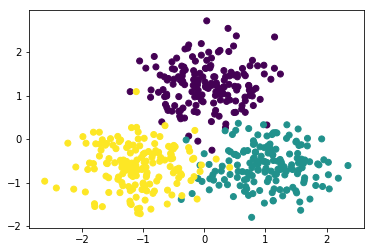

In [18]:
x,y,cl = gen_gmm_data(500)
plt.scatter(x[:,0], x[:,1], c=cl[0])

### Problem 4

Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [ ]:
traj, losses = grad_descent(x, y, iterations=50,learning_rate=0.005)

### Problem 5

Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.